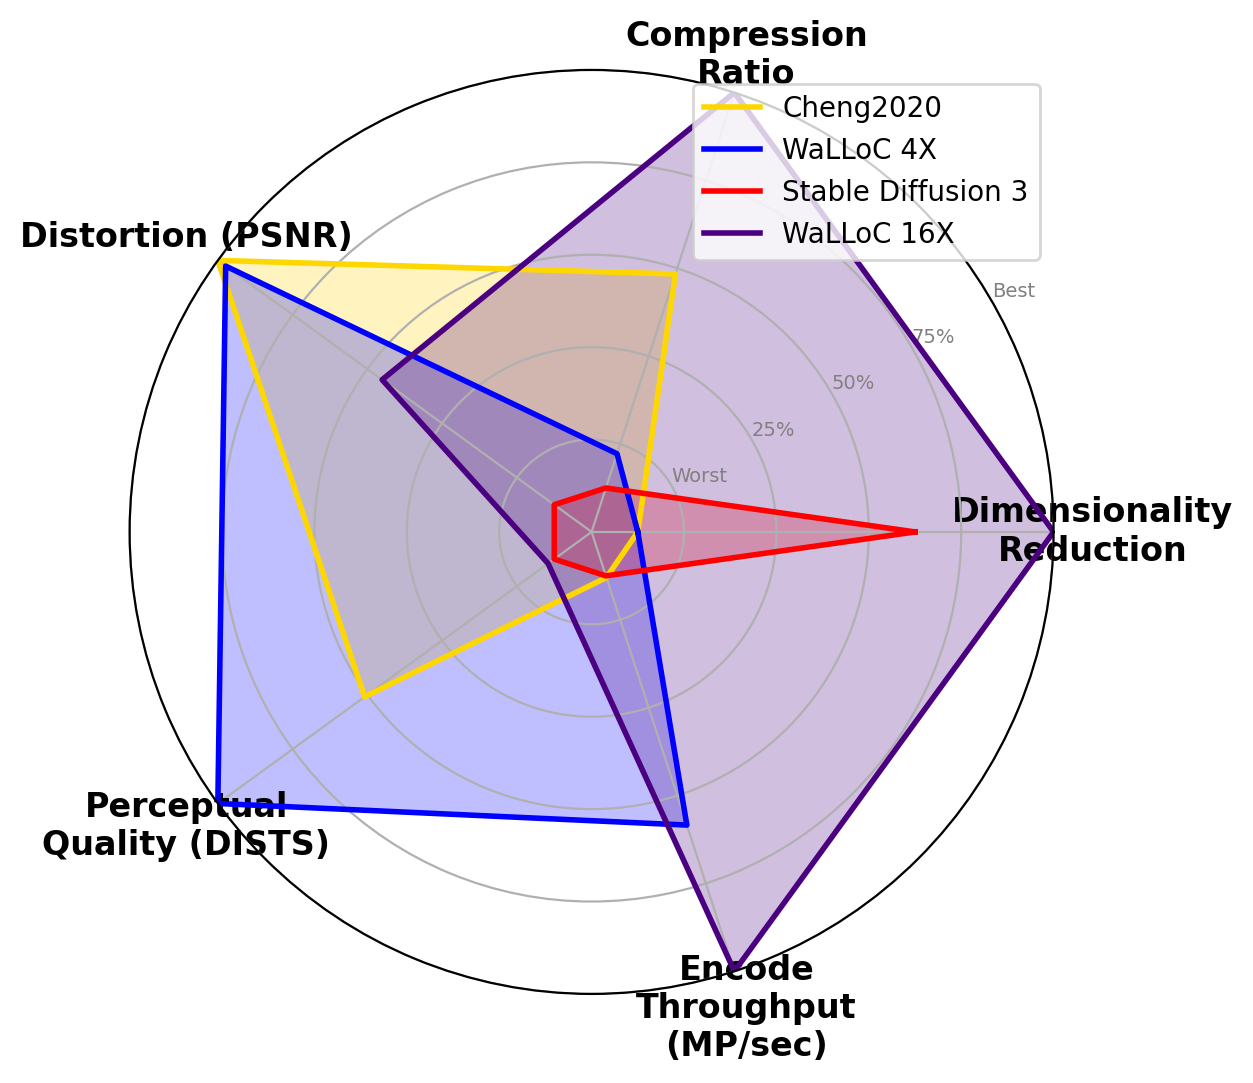

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data without WEBP
data = {
    'Name': ['Cheng2020', 'WaLLoC 4X', 'Stable Diffusion 3', 'WaLLoC 16X'],
    'DR': [4, 4, 12, 16],
    'CR': [21.8, 8.53, 6.00, 35.2],
    'Enc': [0.289, 14.0, 0.195, 22.1],
    'PSNR': [33.8, 33.5, 20.9, 27.5],
    'DISTS': [16.9, 19.3, 13.8, 13.9]
}

df = pd.DataFrame(data)

# Metrics to include
metrics = ['DR','CR', 'PSNR', 'DISTS','Enc' ]

# Normalize data
normalized_data = {}
for metric in metrics:
    min_val = df[metric].min()
    max_val = df[metric].max()
    # Normalize between 0.1 and 1 to give minimum a non-zero radius
    norm = (df[metric] - min_val) / (max_val - min_val)
    norm = norm * 0.9 + 0.1  # Scale to range [0.1, 1]
    normalized_data[metric] = norm

# Create DataFrame of normalized data
norm_df = pd.DataFrame(normalized_data)
norm_df['Name'] = df['Name']

# Number of variables we're plotting
num_vars = len(metrics)

# Compute angle of each axis in the plot (divide plot / number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Complete the loop
angles += angles[:1]

# Metric labels
metric_labels = [
    'Dimensionality\nReduction',
    'Compression\nRatio',
    'Distortion (PSNR)',
    'Perceptual\nQuality (DISTS)',
    'Encode\nThroughput\n(MP/sec)',
]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=200)

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], metric_labels, fontsize=12, fontweight='bold')  # Larger and bold text

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks(
    [0.2, 0.4, 0.6, 0.8, 1.0],
    ["Worst", "25%", "50%", "75%", "Best"],
    color="grey",
    size=7
)
plt.ylim(0, 1)

# Colors and styles without WEBP
colors = {
    'Cheng2020': 'gold',
    'Stable Diffusion 3': 'red',
    'WaLLoC 4X': 'blue',
    'WaLLoC 16X': 'indigo'  # Same shade of blue
}

linestyles = {
    'WaLLoC 4X': 'solid',
    'WaLLoC 16X': 'solid'  # Dotted line to distinguish
}

# Plot data
for i, row in norm_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Repeat first value to close the loop
    if 'WaLLoC' in row['Name']:
        linestyle = linestyles[row['Name']]
    else:
        linestyle = 'solid'
    ax.plot(
        angles,
        values,
        color=colors[row['Name']],
        linewidth=2,
        linestyle=linestyle,
        label=row['Name']
    )
    ax.fill(
        angles,
        values,
        color=colors[row['Name']],
        alpha=0.25
    )

# Add legend
plt.legend(loc='upper right',)

# Show the plot
plt.show()
fig.savefig("radar.svg")